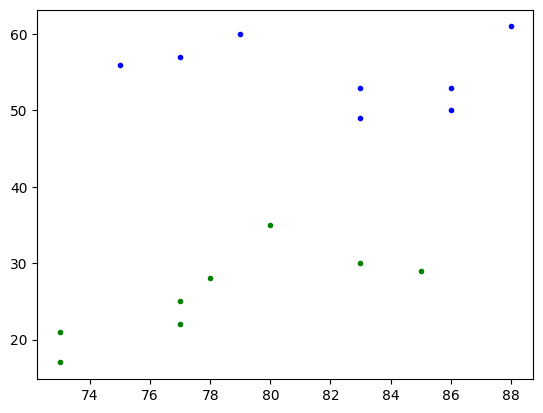

In [23]:
dachshund_length = [77,78,85,83,73,77,73,80]
dachshund_height = [25,28,29,30,21,22,17,35]

samoyed_length = [75,77,86,86,79,83,83,88]
samoyed_height = [56,57,50,53,60,53,49,61]

import matplotlib.pyplot as plt
plt.scatter(dachshund_length, dachshund_height, c='g', marker='.')
plt.scatter(samoyed_length, samoyed_height, c='b', marker='.')
plt.show()

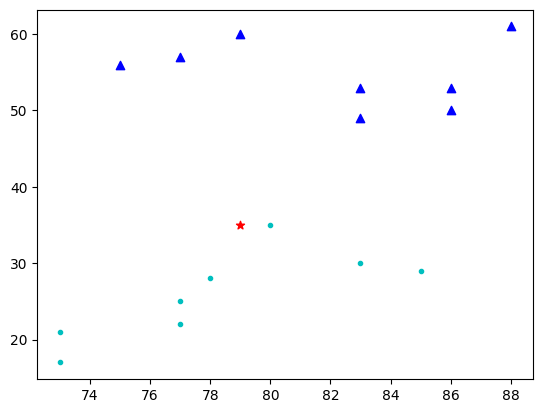

In [3]:
#알 수 없는 종의 데이터 추가
unknown_dog_length = [79]
unknown_dog_height = [35]
plt.scatter(dachshund_length, dachshund_height, c='c', marker='.')
plt.scatter(samoyed_length, samoyed_height, c='b', marker='^')
plt.scatter(unknown_dog_length, unknown_dog_height, c='r', marker='*')
plt.show()
#닥스훈트 계열에 가깝다는 결과를 알 수 있음

In [4]:
#닥스훈트와 사모이드를 구분하기 위해서 0,1 로 구분할 수 있도록 레이블을 지정해준다.

#닥스훈트의 레이블을 0 으로 지정
import numpy as np
dachshund_label = np.zeros(len(dachshund_length))

#사모이드의 레이블을 1 으로 지정
samoyed_label = np.ones(len(samoyed_length))

print(dachshund_label)
print(samoyed_label)

[0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1.]


In [5]:
#데이터를 만든다
dachshund_data = np.column_stack((dachshund_length, dachshund_height))
print(dachshund_data)

[[77 25]
 [78 28]
 [85 29]
 [83 30]
 [73 21]
 [77 22]
 [73 17]
 [80 35]]


In [6]:
samoyed_data = np.column_stack((samoyed_length, samoyed_height))
print(samoyed_data)

#닥스훈트와 사모이드의 데이터셋이 준비가 되었다.

[[75 56]
 [77 57]
 [86 50]
 [86 53]
 [79 60]
 [83 53]
 [83 49]
 [88 61]]


In [7]:
#본격적으로 닥스훈트와 사모이드의 데이터를 비교한다.
dogs = np.concatenate((dachshund_data, samoyed_data),axis=0)
labels = np.concatenate((dachshund_label, samoyed_label),axis=0)

In [8]:
print(labels)
print(dogs)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
[[77 25]
 [78 28]
 [85 29]
 [83 30]
 [73 21]
 [77 22]
 [73 17]
 [80 35]
 [75 56]
 [77 57]
 [86 50]
 [86 53]
 [79 60]
 [83 53]
 [83 49]
 [88 61]]


In [10]:
#이제 이 값을 학습 시킨다
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(dogs, labels)
unknown_new_dog = [[79,35]]
print(knn.predict(unknown_new_dog))

[0.]


In [11]:
#정규분포, 가우시간 분포를 사용하여 300~400 마리를 학습 시킨다 (수학적 기법 사용)
#데이터 증강하기
dachshund_length_mean = np.mean(dachshund_length)   #닥스훈트의 길이 평균
dachshund_height_mean = np.mean(dachshund_height)   #닥스훈트의 높이 평균
print(dachshund_length_mean)
print(dachshund_height_mean)

78.25
25.875


In [12]:
samoyed_length_mean = np.mean(samoyed_length)   #사모이드의 길이 평균
samoyed_height_mean = np.mean(samoyed_height)   #사모이드의 높이 평균
print(samoyed_length_mean)
print(samoyed_height_mean)

82.125
54.875


In [13]:
#통계적 기반으로 데이터 만들기
new_normal_dachshund_length_data = np.random.normal(dachshund_length_mean, 7, 200)#표준편차7, 샘플200개
new_normal_dachshund_height_data = np.random.normal(dachshund_height_mean, 7, 200)

new_normal_samoyed_length_data = np.random.normal(samoyed_length_mean, 7, 200)
new_normal_samoyed_height_data = np.random.normal(samoyed_height_mean, 7, 200)

print(new_normal_dachshund_length_data)
print(new_normal_dachshund_height_data)
print(new_normal_samoyed_length_data)
print(new_normal_samoyed_height_data)

[81.91766067 75.86794481 74.80169294 75.59799204 76.92649799 76.71987276
 74.0475761  82.8704169  84.39016465 76.49303817 88.53184931 72.57606592
 76.08974359 78.99602781 69.83488671 77.89380989 66.21324746 76.71222715
 81.85681856 92.10833373 82.72252818 68.73735548 82.09400977 69.0892028
 82.55904161 84.61516013 82.53151102 76.95732188 78.98334284 84.32536066
 80.65962703 77.89458924 82.94360327 77.2415928  71.3422008  75.57701849
 83.07686604 70.18268907 76.72702173 95.46825553 73.14286232 78.72866164
 69.97681593 89.067074   74.90846275 67.41089397 66.95337745 84.57524407
 73.81080548 73.79072072 74.63274287 81.51147845 78.76450371 68.07559684
 75.33716155 86.94456625 76.18506665 85.96478132 86.72364644 69.14210566
 83.82642087 67.83081656 88.3150743  78.20317666 71.65247567 74.38255416
 66.68510122 80.7294714  66.76077424 75.79660078 75.57419251 79.40781152
 80.70295806 86.53712144 74.13954478 84.20091379 82.70803285 86.04513473
 72.60881393 74.04815712 70.36200135 70.05966736 88.

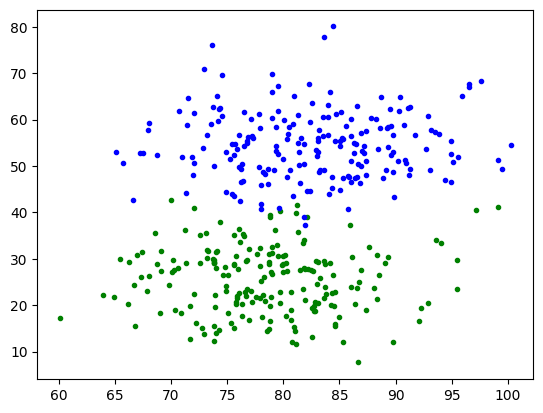

In [22]:
#새롭게 데이터 증강된 그래프 그리기
plt.scatter(new_normal_dachshund_length_data, new_normal_dachshund_height_data, c='g', marker='.')
plt.scatter(new_normal_samoyed_length_data, new_normal_samoyed_height_data, c='b', marker='.')
plt.show()

In [25]:
#새로운 데이터 생성
new_dachshund_data = np.column_stack((new_normal_dachshund_length_data, new_normal_dachshund_height_data))
new_samoyed_data = np.column_stack((new_normal_samoyed_length_data, new_normal_samoyed_height_data))
print(new_dachshund_data)

[[81.91766067 27.77051584]
 [75.86794481 21.63461927]
 [74.80169294 28.15098052]
 [75.59799204 15.17205402]
 [76.92649799 32.00746259]
 [76.71987276 29.54342157]
 [74.0475761  31.39656104]
 [82.8704169  20.77947285]
 [84.39016465 26.47236933]
 [76.49303817 34.89948062]
 [88.53184931 26.5298848 ]
 [72.57606592 29.05178156]
 [76.08974359 36.31916833]
 [78.99602781 32.60214632]
 [69.83488671 24.43054092]
 [77.89380989 28.44706725]
 [66.21324746 29.23897266]
 [76.71222715 21.89782132]
 [81.85681856 34.00595973]
 [92.10833373 16.53736594]
 [82.72252818 19.92086719]
 [68.73735548 28.8051334 ]
 [82.09400977 39.0857094 ]
 [69.0892028  31.7035064 ]
 [82.55904161 13.24283515]
 [84.61516013 15.40093715]
 [82.53151102 19.39437984]
 [76.95732188 16.72316269]
 [78.98334284 31.28709291]
 [84.32536066 22.55806398]
 [80.65962703 22.86419007]
 [77.89458924 32.35105959]
 [82.94360327 29.57624861]
 [77.2415928  20.6540578 ]
 [71.3422008  29.01154277]
 [75.57701849 28.77909235]
 [83.07686604 29.33865984]
 

In [26]:
print(new_samoyed_data)

[[ 81.28732148  61.01920037]
 [ 83.50581112  60.51074132]
 [ 76.08672516  56.73313228]
 [ 76.42662267  46.72270986]
 [ 80.53380135  58.34343015]
 [ 78.62100896  46.02112098]
 [ 90.71189772  58.79610511]
 [ 82.97678186  52.17805929]
 [ 77.1126177   60.04188286]
 [ 85.60671198  58.63636454]
 [ 82.35078315  44.51873463]
 [ 79.54803222  52.57649461]
 [ 78.6702086   49.30300524]
 [ 86.43312969  47.40514485]
 [ 75.62428038  52.44459601]
 [ 80.04620942  59.86372934]
 [ 85.06583287  55.40612721]
 [ 81.60374835  55.95328018]
 [ 86.89934736  57.20367039]
 [ 90.22550522  51.11749537]
 [ 87.18333502  52.72403386]
 [ 87.34594035  51.01087595]
 [ 99.09699764  51.20041722]
 [ 74.32882389  62.45749354]
 [ 71.93922743  48.13271691]
 [ 91.0790167   62.47198431]
 [ 84.37148411  47.64753029]
 [ 82.32603568  67.77155707]
 [ 71.32317775  44.12586347]
 [ 74.9407517   53.10034831]
 [ 75.6015604   43.55364227]
 [ 80.5989685   49.0609799 ]
 [ 89.52022688  62.21285114]
 [ 81.39116108  52.98513349]
 [ 83.12469374

In [27]:
#새로운 데이터를 합친다,
#새로운 데이터에 레이블 지정
new_dachshund_label = np.zeros(len(new_dachshund_data))
new_samoyed_label = np.ones(len(new_samoyed_data))
print(new_dachshund_label)
print(new_samoyed_label)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 

In [28]:
new_dogs = np.concatenate((new_dachshund_data, new_samoyed_data))#속성
new_labels = np.concatenate((new_dachshund_label, new_samoyed_label))#값
print(new_dogs)

[[ 81.91766067  27.77051584]
 [ 75.86794481  21.63461927]
 [ 74.80169294  28.15098052]
 [ 75.59799204  15.17205402]
 [ 76.92649799  32.00746259]
 [ 76.71987276  29.54342157]
 [ 74.0475761   31.39656104]
 [ 82.8704169   20.77947285]
 [ 84.39016465  26.47236933]
 [ 76.49303817  34.89948062]
 [ 88.53184931  26.5298848 ]
 [ 72.57606592  29.05178156]
 [ 76.08974359  36.31916833]
 [ 78.99602781  32.60214632]
 [ 69.83488671  24.43054092]
 [ 77.89380989  28.44706725]
 [ 66.21324746  29.23897266]
 [ 76.71222715  21.89782132]
 [ 81.85681856  34.00595973]
 [ 92.10833373  16.53736594]
 [ 82.72252818  19.92086719]
 [ 68.73735548  28.8051334 ]
 [ 82.09400977  39.0857094 ]
 [ 69.0892028   31.7035064 ]
 [ 82.55904161  13.24283515]
 [ 84.61516013  15.40093715]
 [ 82.53151102  19.39437984]
 [ 76.95732188  16.72316269]
 [ 78.98334284  31.28709291]
 [ 84.32536066  22.55806398]
 [ 80.65962703  22.86419007]
 [ 77.89458924  32.35105959]
 [ 82.94360327  29.57624861]
 [ 77.2415928   20.6540578 ]
 [ 71.3422008 

In [29]:
print(new_labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [30]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(new_dogs, new_labels, test_size=0.2, random_state=0) #테스트 사이즈는 20%

In [31]:
print(X_train.shape)

(320, 2)


In [32]:
k = 5
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)
print(f'훈련한 정확도: {knn.score(X_train, y_train)}')

훈련한 정확도: 0.984375


In [33]:
y_predict = knn.predict(X_test)
print(y_predict) #예상값

[1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1.]


In [34]:
print(y_test) #정답

[0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 1. 1. 1.]


In [35]:
from sklearn.metrics import accuracy_score
print(f'테스트 정확도: {accuracy_score(y_test, y_predict)}')

테스트 정확도: 0.9625
